# **Basic Drawing**


In this section, we’ll cover basic image transformations. These
are common techniques that you’ll likely apply to images,
including translation, rotation, resizing, flipping, and cropping.

In [4]:
# 
# Based environment:
# 
from __future__ import print_function
from  matplotlib import pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import pandas as pd

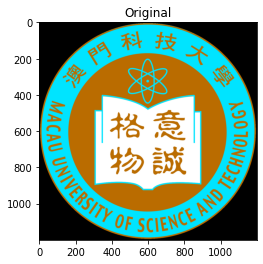

In [5]:
image = cv2.imread("../img_source/must_logo.png")
plt.imshow(image)
plt.title('Original')
plt.show()

## **Translation** 

The first method we are going to explore is translation.
Translation is the shifting of an image along the $x$ and $y$
axis.

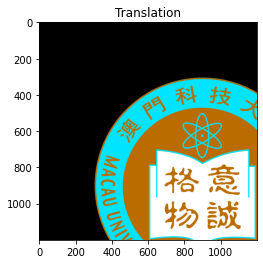

In [3]:
# Store height and width of the image
height, width = image.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))

plt.imshow(img_translation)
plt.title('Translation')
plt.show()

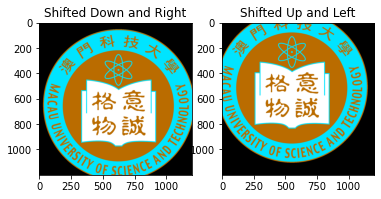

In [4]:
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.subplot(1, 2, 1)
plt.title('Shifted Down and Right')
plt.imshow(shifted)

M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.subplot(1, 2, 2)
plt.title('Shifted Up and Left')
plt.imshow(shifted)
plt.show()

# shifted = imutils.translate(image, 0, 100)


### Affine Transformation

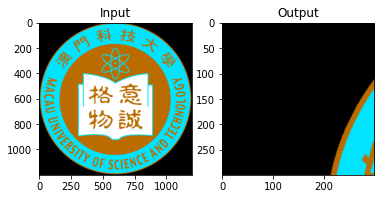

In [7]:
rows,cols,ch=image.shape
pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[10,100],[200,50],[100,250]])

M=cv2.getAffineTransform(pts1,pts2)
dst=cv2.warpAffine(image,M,(300,300))

plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Prespect Transformation

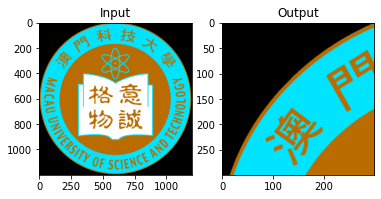

In [8]:
rows,cols,ch=image.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M=cv2.getPerspectiveTransform(pts1,pts2)
dst=cv2.warpPerspective(image,M,(300,300))

plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## **Rotation**

Rotation is exactly what it sounds like: rotating an image
by some angle $\theta$. In this section, we’ll explore how to rotate
an image. 

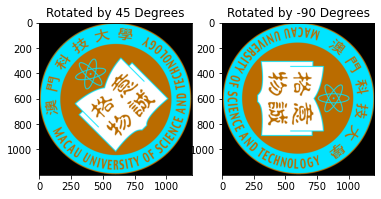

In [6]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

plt.subplot(1,2,1)
plt.imshow(rotated)
plt.title("Rotated by 45 Degrees")


M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

plt.subplot(1,2,2)
plt.imshow(rotated)
plt.title('Rotated by -90 Degrees')
plt.show()

## **Resize**

Perhaps, not surprisingly, we will be using the `cv2.resize`
function to resize our images. But we need to keep in mind
the aspect ratio of the image when we are using this function.

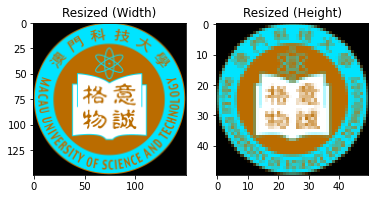

In [7]:
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

plt.subplot(1,2,1)
plt.imshow(resized)
plt.title("Resized (Width)")

r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

plt.subplot(1,2,2)
plt.imshow(resized)
plt.title("Resized (Height)")
plt.show()

## Cropping, Flipping and Masking

Text(0.5, 1.0, 'T_Rex Face')

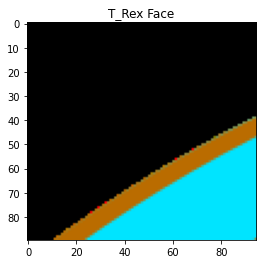

In [13]:
cropped = image[30:120 , 240:335]
plt.imshow(cropped)
plt.title("T_Rex Face")


Text(0.5, 1.0, 'Flipped Horizontally & Vertically')

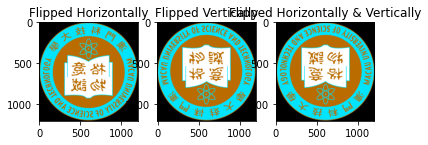

In [6]:
flipped=cv2.flip(image,1)
plt.subplot(1,3,1)
plt.imshow(flipped)
plt.title("Flipped Horizontally")

flipped=cv2.flip(image,0)
plt.subplot(1,3,2)
plt.imshow(flipped)
plt.title("Flipped Vertically")

flipped=cv2.flip(image,-1)
plt.subplot(1,3,3)
plt.imshow(flipped)
plt.title("Flipped Horizontally & Vertically")

Text(0.5, 1.0, 'Mask Applied to Imag')

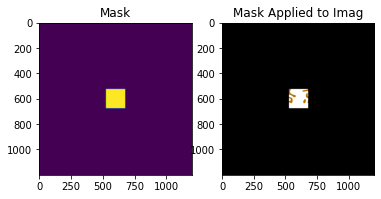

In [15]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
(x, y) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (x - 75, y - 75), (x + 75 , y + 75), 255,-1)
# cv2.imshow("Mask", mask)
plt.subplot(1,2,1)
plt.imshow(mask)
plt.title("Mask")


masked = cv2.bitwise_and(image, image, mask = mask)
# cv2.imshow("Mask Applied to Image", masked)
plt.subplot(1,2,2)
plt.imshow(masked)
plt.title("Mask Applied to Imag")

### Sub-brief Note

In [8]:
def translate(image , x ,y):
    M=np.float32([[1,0,x],[0,1,y]])
    shifted=cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
    
    return shifted 

def rotate(image,angle, center = None, scale = 1.0):
    h,w=image.shape[:2]
    if center is None:
        center=(w//2,h//2)
    M=cv2.getRotationMatrix2D(center,angle,scale)
    rotated=cv2.warpAffine(image,M,(w,h))
    return rotated 

def resize(image, width = None, height = None, inter = cv2.
INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

## **Arithmetic**

In [9]:
print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


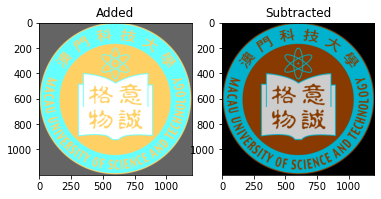

In [16]:

M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
cv2.imshow("Added", added)

plt.subplot(1,2,1)
plt.imshow(added)
plt.title("Added")


M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
plt.subplot(1,2,2)
plt.imshow(subtracted)
plt.title("Subtracted")
plt.show()